# SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL_Normalized-dataset.csv",sep='\t',decimal=",",index_col=0)

In [2]:
df.head()

,Imax,E,PIL,MeanD,EDate,class
0,0.009794,0.494960,0.167672,0.608219,0.366637,0
1,0.005001,0.591952,0.167672,0.330594,0.634431,0
2,0.004793,0.416542,0.167672,0.084932,0.000000,0
3,0.014795,0.454229,0.167672,0.421918,0.430229,0
4,0.009794,0.563574,0.167672,0.203836,0.645860,0


In [3]:
from sklearn.model_selection import train_test_split

label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

## Grid Search

In [5]:


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 100]}]

clf = GridSearchCV( SVC(), tuned_parameters,n_jobs=3,verbose=2,scoring='accuracy')
clf.fit(train_set, train_label)

print("Best parameters:",clf.best_params_)
print("Best Score: ",clf.best_score_)

print("Complete Grid search:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   15.4s finished
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score:  0.5028240529211943
Complete Grid search:
0.381 (+/-0.055) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.381 (+/-0.055) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.503 (+/-0.032) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.409 (+/-0.042) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


## Modello Finale

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, gamma=0.001,probability=True)
svm.fit(train_set, train_label)

SVC(C=100, gamma=0.001, probability=True)

In [12]:

from sklearn.metrics import classification_report
test_pred_proba_svm = svm.predict_proba(test_set)
test_pred_svm = svm.predict(test_set)
print(classification_report(test_label, 
                            test_pred_svm))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       507
           1       0.42      0.34      0.38       507
           2       0.52      0.62      0.57       507

    accuracy                           0.51      1521
   macro avg       0.51      0.51      0.51      1521
weighted avg       0.51      0.51      0.51      1521



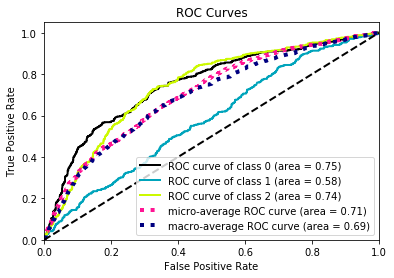

In [13]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba_svm)
plt.show()